In [1]:
import pandas as  pd
import matplotlib.pyplot as plt 
import tensorflow as tf
import quandl
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error ,  r2_score
import datetime
from sklearn.model_selection import KFold

In [2]:
Data = quandl.get("BCHARTS/BITSTAMPUSD", authtoken="4QxSz6Qa948RE7_PqsXw", collapse="daily")

In [3]:
Data

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-13,5.80,6.00,5.65,5.97,58.371382,3.460974e+02,5.929231
2011-09-14,5.58,5.72,5.52,5.53,61.145984,3.418548e+02,5.590798
2011-09-15,5.12,5.24,5.00,5.13,80.140795,4.082590e+02,5.094272
2011-09-16,4.82,4.87,4.80,4.85,39.914007,1.937631e+02,4.854515
2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000e+00,4.870000
...,...,...,...,...,...,...,...
2021-06-06,35532.59,36510.58,35250.00,35808.85,2526.733620,9.074431e+07,35913.681035
2021-06-07,35810.69,36808.30,33321.09,33582.62,4913.040225,1.747388e+08,35566.337930
2021-06-08,33567.51,34085.61,31025.00,33411.69,9044.648470,2.954111e+08,32661.425472


In [4]:
print(Data.head(5).to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 Open &  High &  Low &  Close &  Volume (BTC) &  Volume (Currency) &  Weighted Price \\
 5.80 &  6.00 & 5.65 &   5.97 &     58.371382 &         346.097389 &        5.929231 \\
\midrule
 5.58 &  5.72 & 5.52 &   5.53 &     61.145984 &         341.854813 &        5.590798 \\
 5.12 &  5.24 & 5.00 &   5.13 &     80.140795 &         408.259002 &        5.094272 \\
 4.82 &  4.87 & 4.80 &   4.85 &     39.914007 &         193.763147 &        4.854515 \\
 4.87 &  4.87 & 4.87 &   4.87 &      0.300000 &           1.461000 &        4.870000 \\
\bottomrule
\end{tabular}



In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3550 entries, 2011-09-13 to 2021-06-10
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               3550 non-null   float64
 1   High               3550 non-null   float64
 2   Low                3550 non-null   float64
 3   Close              3550 non-null   float64
 4   Volume (BTC)       3550 non-null   float64
 5   Volume (Currency)  3550 non-null   float64
 6   Weighted Price     3550 non-null   float64
dtypes: float64(7)
memory usage: 221.9 KB


In [6]:
Data.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3.550000e+03,3550.000000
mean,5293.827473,5460.398966,5099.629175,5300.631076,9565.018491,4.656404e+07,5287.246412
std,10244.410786,10583.008640,9829.693772,10248.045628,9989.736588,9.358006e+07,10229.674915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,235.337500,238.835000,230.955000,235.607500,3641.451698,1.560178e+06,235.218036
50%,669.330000,684.145000,651.015000,671.120000,6935.980151,7.472516e+06,665.240968
75%,7335.032500,7521.345000,7150.000000,7343.490000,12232.375427,5.204943e+07,7319.430445
max,63605.690000,64895.220000,61998.900000,63564.480000,137070.178338,1.369434e+09,63314.685801


In [7]:
Data.reset_index(level=0,inplace=True )

In [8]:
Data.head(5)

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2011-09-13,5.80,6.00,5.65,5.97,58.371382,346.097389,5.929231
1,2011-09-14,5.58,5.72,5.52,5.53,61.145984,341.854813,5.590798
2,2011-09-15,5.12,5.24,5.00,5.13,80.140795,408.259002,5.094272
3,2011-09-16,4.82,4.87,4.80,4.85,39.914007,193.763147,4.854515
4,2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000


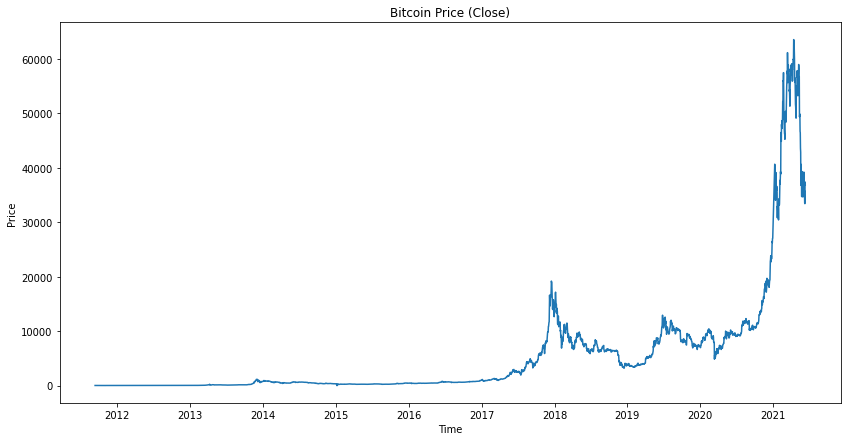

In [9]:
fig=plt.figure(figsize=(14,7))
plt.plot(Data['Date'], Data['Close'])
plt.title('Bitcoin Price (Close)')
plt.ylabel('Price');
plt.xlabel('Time');
plt.show()
fig.savefig("btcev.png")

In [10]:

# mask = (Data['Date'] >= '2014-12-01') 
# data = Data.loc[mask]
data = Data.iloc[:,1:]
data = data.astype('float32')

In [11]:
data

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,5.800000,6.000000,5.650000,5.970000,58.371384,3.460974e+02,5.929231
1,5.580000,5.720000,5.520000,5.530000,61.145985,3.418548e+02,5.590797
2,5.120000,5.240000,5.000000,5.130000,80.140793,4.082590e+02,5.094272
3,4.820000,4.870000,4.800000,4.850000,39.914005,1.937632e+02,4.854515
4,4.870000,4.870000,4.870000,4.870000,0.300000,1.461000e+00,4.870000
...,...,...,...,...,...,...,...
3545,35532.589844,36510.578125,35250.000000,35808.851562,2526.733643,9.074430e+07,35913.679688
3546,35810.691406,36808.300781,33321.089844,33582.621094,4913.040039,1.747388e+08,35566.339844
3547,33567.511719,34085.609375,31025.000000,33411.691406,9044.648438,2.954111e+08,32661.425781
3548,33413.191406,37556.250000,32423.720703,37400.000000,8539.586914,3.003795e+08,35174.945312


In [12]:
n_samples = data.shape[0]

In [13]:
data.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3.550000e+03,3550.000000
mean,5293.827637,5460.398926,5099.628906,5300.630371,9565.018555,4.656405e+07,5287.246094
std,10244.411133,10583.008789,9829.693359,10248.045898,9989.736328,9.358006e+07,10229.674805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,235.337505,238.834999,230.955002,235.607506,3641.451660,1.560178e+06,235.218033
50%,669.330017,684.144989,651.015015,671.119995,6935.980225,7.472516e+06,665.240967
75%,7335.032593,7521.344971,7150.000000,7343.489990,12232.375488,5.204943e+07,7319.430420
max,63605.691406,64895.218750,61998.898438,63564.480469,137070.171875,1.369434e+09,63314.687500


<AxesSubplot:title={'center':'Correlation entre les variables'}>

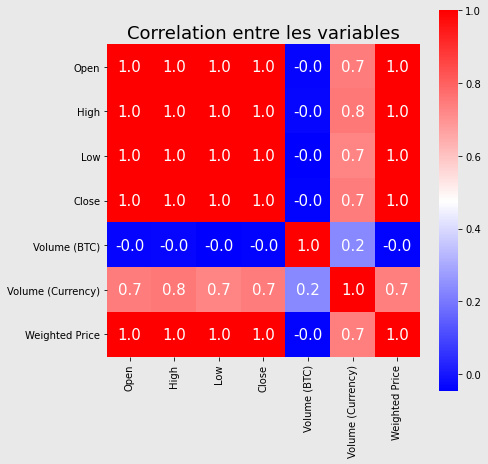

In [14]:
fig=plt.figure(figsize=(7,7))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Correlation entre les variables",size=18)
sns.heatmap(data.corr(),square= True, fmt='.1f',annot=True, annot_kws={'size':15},cmap="bwr")

## Trading indicatiors

#### MACD INDICATOR

In [15]:
def MACD(df):
    EMA12 = pd.DataFrame.ewm(df,span=12).mean()
    EMA26 = pd.DataFrame.ewm(df,span=26).mean()
    MACD  = EMA12 - EMA26
    
    Signal = pd.DataFrame.ewm(MACD,span=9).mean()
    
    Macd_Hist = MACD-Signal
    
    return Macd_Hist , MACD , Signal
    

In [16]:
MACD_hist , MACD , Signal =MACD(data["Close"])

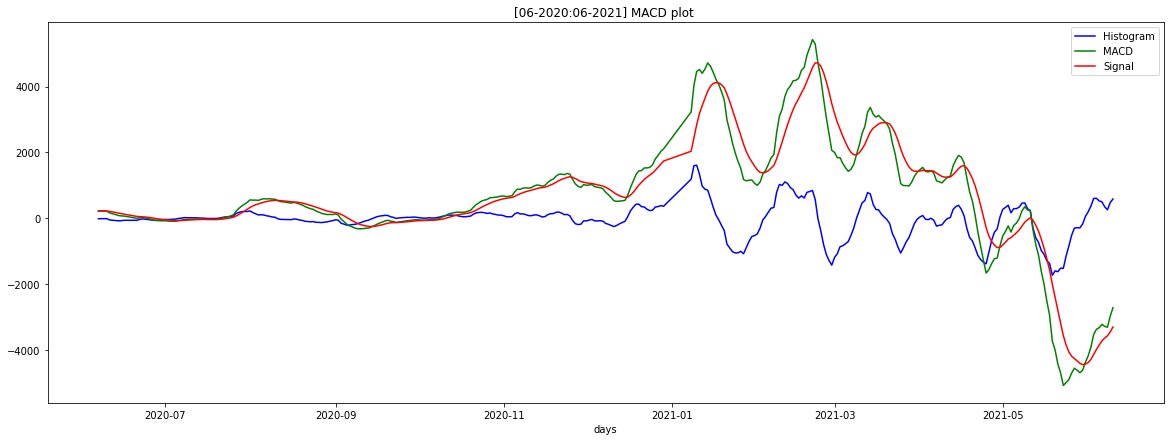

In [17]:
plt.figure(figsize=(20,7))
plt.plot(Data['Date'].iloc[len(MACD_hist)-360 : len(MACD_hist)], MACD_hist[len(MACD_hist)-360 : len(MACD_hist)],color='b', label='Histogram')
plt.plot(Data['Date'].iloc[len(MACD_hist)-360 : len(MACD_hist)], MACD[len(MACD_hist)-360 : len(MACD_hist)],color='g', label='MACD')
plt.plot(Data['Date'].iloc[len(MACD_hist)-360 : len(MACD_hist)], Signal[len(MACD_hist)-360 : len(MACD_hist)],color='r', label='Signal')
plt.xlabel('days')
plt.legend()
plt.title("[06-2020:06-2021] MACD plot ")
plt.show()

####  Stochastics Oscillator

In [18]:
def Stoch_Oscillator(df):
    L14 = df['Low'].rolling(14).min()
    H14 = df['High'].rolling(14).max()
    K   =  (df['Close']- L14)*100/(H14 - L14)
    return K
    

In [19]:
K=Stoch_Oscillator(data)

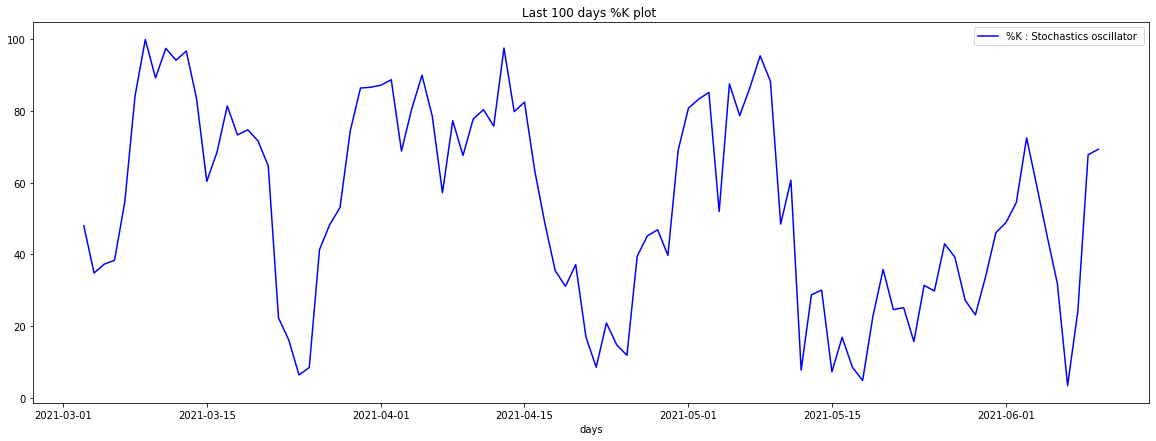

In [20]:
plt.figure(figsize=(20,7))
plt.plot(Data['Date'].iloc[len(MACD_hist)-100 : len(MACD_hist)], K[len(MACD_hist)-100 : len(MACD_hist)],color='b', label='%K : Stochastics oscillator ')
plt.xlabel('days')
plt.legend()
plt.title("Last 100 days %K plot ")
plt.show()

#### Average true range

In [21]:
def Average_T_range(df):
    HL = df['High']-df['Low']
    HC = np.abs(df['High']-df['Close'].shift())
    LC =  np.abs(df['Low']-df['Close'].shift())
    ct = pd.concat([HL,HC,LC],axis=1)
    Tr = np.max(ct,axis=1) 
    ATR = Tr.rolling(14).mean()
    return ATR

In [22]:
atr = Average_T_range(data)

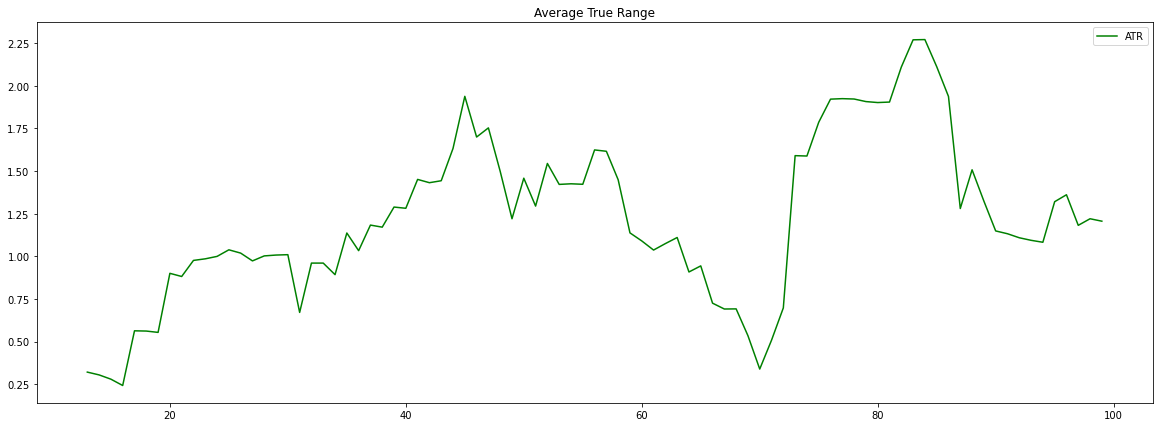

In [23]:
plt.figure(figsize=(20,7))
plt.plot(atr[0:100],label='ATR',color='green')
plt.title('Average True Range')
plt.legend()
plt.show()

### Getting final  data

In [24]:
data['MACD']= MACD_hist
data['%K']=K
data['ATR']=atr
data['Close Target'] = data['Close'].shift(-1)

In [25]:
df = data[['Open','High','Low','Close','Volume (BTC)','Volume (Currency)','Weighted Price','MACD','%K','ATR','Close Target']]

In [26]:
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,MACD,%K,ATR,Close Target
0,5.80,6.00,5.65,5.97,58.371384,346.097382,5.929231,0.000000,NaN,NaN,5.53
1,5.58,5.72,5.52,5.53,61.145985,341.854828,5.590797,-0.004387,NaN,NaN,5.13
2,5.12,5.24,5.00,5.13,80.140793,408.259003,5.094272,-0.011507,NaN,NaN,4.85
3,4.82,4.87,4.80,4.85,39.914005,193.763153,4.854515,-0.018434,NaN,NaN,4.87
4,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000,-0.018028,NaN,NaN,4.92


In [27]:
df=df.dropna()

In [28]:
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,MACD,%K,ATR,Close Target
13,6.06,6.06,4.80,4.80,39.578465,236.800858,5.983074,-0.000551,0.000000,0.320714,4.92
14,4.85,4.92,4.85,4.92,24.354500,119.225060,4.895401,-0.027334,9.523802,0.304286,4.82
15,4.90,4.91,4.82,4.82,83.053329,403.846619,4.862498,-0.046902,1.587300,0.279286,4.82
16,4.81,4.82,4.81,4.82,46.964500,226.197220,4.816345,-0.056163,1.587300,0.242143,0.00
17,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,-0.300575,0.000000,0.562857,0.00


## Normalize data

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))

df = df.drop(['Open','High','Low','Volume (BTC)','Volume (Currency)','Weighted Price'], axis=1)
df.head()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)


## Initialize Model

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers


In [31]:
def model(hp):
    model = Sequential()
    model.add(layers.LSTM(units=hp.Int('units_input', 80, 120, step=10), return_sequences = True ,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.Dropout(hp.Float('dropout_input', 0, 0.5, step=0.1, default=0.2)))
    n=hp.Int('number of hidden layers',2,6)
    for i in range(n):
        if i < n-1 :
            model.add(layers.LSTM(units=hp.Int('units_{0}'.format(i), 50, 90, step=10), return_sequences = True ))
            model.add(layers.Dropout(hp.Float('dropout_{0}'.format(i), 0, 0.5, step=0.1, default=0.2)))
        else : 
            model.add(layers.LSTM(units=hp.Int('units_{0}'.format(n-1), 50, 90, step=10)))
            model.add(layers.Dropout(hp.Float('dropout_{0}'.format(n-1), 0, 0.5, step=0.1, default=0.2)))
    model.add(layers.Dense(1))
    model.add(layers.Activation('linear'))
    
    model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-6,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),metrics='mse')

    return model




###  Creating time series data


In [32]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:df.shape[1]-1]
y=df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [33]:
# timesteps data
def create_dataset(X,y,time_steps=1):
    X_train=[]
    y_train=[]
    for i in range(time_steps,X.shape[0]):
        X_train.append(X[i-time_steps:i])
        y_train.append(y[i])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train , y_train

In [34]:
def test_set(X_train,X_test,y_train,y_test,time_steps=1):
    x=X_train.tail(time_steps)
    y= y_train.tail(time_steps)
    X_test=x.append(X_test,ignore_index=True)
    y_test=y.append(y_test,ignore_index=True)
    return create_dataset(X_test,y_test)

In [35]:
X_test , y_test = test_set(X_train,X_test,y_train,y_test)

In [36]:
X_train,y_train = create_dataset(X_train,y_train)


#### Hyper-Parameters tuning

In [37]:
import kerastuner as kt

tuner = kt.Hyperband( model,
    objective='val_loss',
    max_epochs=30,
    hyperband_iterations=2,project_name='LSTM-hyper-parameters2')

INFO:tensorflow:Reloading Oracle from existing project .\LSTM-hyper-parameters2\oracle.json
INFO:tensorflow:Reloading Tuner from .\LSTM-hyper-parameters2\tuner0.json


In [38]:
tuner.search(X_train,  y_train , epochs = 20,validation_data=(X_test,y_test),shuffle = False)

INFO:tensorflow:Oracle triggered exit


###  Fitting the model

In [39]:
seed = 7
np.random.seed(seed)
cvscores = []
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
indexes=[]

best_hps = tuner.get_best_hyperparameters(1)[0]
model = tuner.get_best_models(1)[0]
X_t , y_t = create_dataset(X, y)
for train, test in kfold.split(X_t,y_t):
    es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    history = model.fit(X_t[train], y_t[train], epochs=100,validation_data=(X_t[test],y_t[test]),shuffle=False,callbacks=[es_callback])
    cvscores.append(model.evaluate(X_t[test],y_t[test])[1])
    indexes.append([train,test])

Epoch 1/100
100/100 [==============================] - 7s 16ms/step - loss: 0.0827 - mse: 0.0271 - val_loss: 0.0746 - val_mse: 0.0218
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0787 - mse: 0.0253 - val_loss: 0.0731 - val_mse: 0.0201
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0756 - mse: 0.0221 - val_loss: 0.0699 - val_mse: 0.0169
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0665 - mse: 0.0148 - val_loss: 0.0622 - val_mse: 0.0097
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0373 - mse: 0.0027 - val_loss: 0.0735 - val_mse: 0.0064
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0453 - mse: 0.0037 - val_loss: 0.0668 - val_mse: 0.0054
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0387 - mse: 0.0032 - val_loss: 0.0507 - val_mse: 0.0033
Epoch 8/100
100/100 [==============================] - 0s 4ms/step -

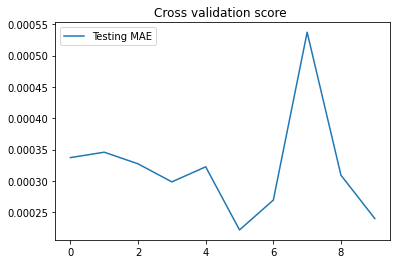

In [40]:

plt.plot(cvscores,   label= 'Testing MAE')
plt.title ( 'Cross validation score ')
plt.legend()
plt.show()


In [41]:
best_split=cvscores.index(np.min(cvscores))
train = indexes[best_split][0]
test= indexes[best_split][1]

In [42]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(X_t[train], y_t[train], epochs=100,validation_data=(X_t[test],y_t[test]),shuffle=False,callbacks=[es_callback,tensorboard_callback])

Epoch 1/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0091 - mse: 4.3267e-04 - val_loss: 0.0113 - val_mse: 1.9518e-04
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 0.0089 - mse: 4.0616e-04 - val_loss: 0.0104 - val_mse: 1.8717e-04
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0089 - mse: 4.3086e-04 - val_loss: 0.0106 - val_mse: 1.8152e-04
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0086 - mse: 3.7619e-04 - val_loss: 0.0117 - val_mse: 1.9550e-04
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0094 - mse: 4.5230e-04 - val_loss: 0.0139 - val_mse: 2.5682e-04


In [43]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12188), started 3:32:54 ago. (Use '!kill 12188' to kill it.)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            42000     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 70)             47880     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 70)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 7

<Figure size 1440x504 with 0 Axes>

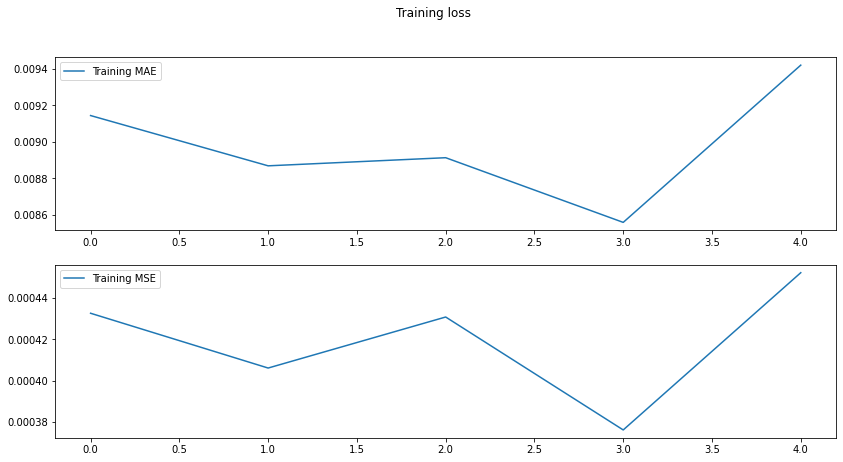

In [45]:
plt.figure(figsize=(20,7))

f ,(ax1, ax2) = plt.subplots(2, 1,figsize=(14,7))
# f.figure(figsize=(20,7))
ax1.plot(history.history['loss'],   label= 'Training MAE')
ax2.plot(history.history['mse'],   label= 'Training MSE')
f.suptitle("Training loss")
ax1.legend()
ax2.legend()
plt.show()
f.savefig("Training loss.png")

### Predict and test

In [46]:
X_all,y_all=create_dataset(X,y)
y_pred = model.predict(X_all)


In [47]:
y_pred_inv=(1/scaler.scale_[len(scaler.scale_)-1])*y_pred

In [48]:
y_test_inv=(1/scaler.scale_[len(scaler.scale_)-1])*y_all

In [49]:
score= r2_score(y_test_inv,y_pred_inv)
print ( 'R2 score : {0:.3f} \n'.format(score))

R2 score : 0.988 



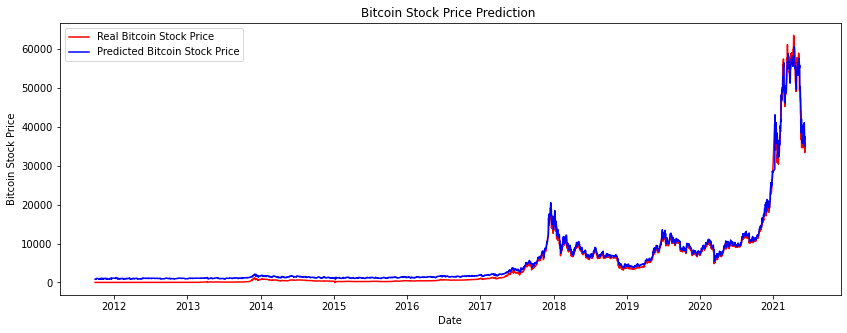

In [50]:
plt.figure(figsize=(14,5))
plt.plot(Data['Date'].iloc[15:],y_test_inv, color = 'red', label = 'Real Bitcoin Stock Price')
plt.plot(Data['Date'].iloc[15:],y_pred_inv, color = 'blue', label = 'Predicted Bitcoin Stock Price')
plt.title('Bitcoin Stock Price Prediction ')
plt.xlabel('Date')
plt.ylabel('Bitcoin Stock Price')
plt.legend()
plt.show()